In [1]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import random

In [57]:
sim = HathorSimulator(block_weight=23.66463018297268)

m0 = Miner(hashpower=100000)
sim.add_miner(m0)

g1 = TxGenerator(tx_lambda=4., hashpower=100000)
sim.add_tx_generator(g1)

In [58]:
sim.run(3600*12, report_interval=3600)
print(len(sim.blocks), len(sim.transactions))

  7.80 [     3600.06] blocks=24 txs=14441 tips=0
 16.07 [     7200.33] blocks=44 txs=28873 tips=3
 24.03 [    10800.45] blocks=65 txs=43202 tips=1
 32.13 [    14400.60] blocks=86 txs=57658 tips=0
 39.98 [    18000.65] blocks=113 txs=71999 tips=0
 48.36 [    21600.84] blocks=143 txs=86563 tips=1
 56.41 [    25200.96] blocks=173 txs=100676 tips=1
 65.15 [    28801.05] blocks=195 txs=115044 tips=4
 73.45 [    32401.36] blocks=224 txs=129461 tips=2
 82.31 [    36001.45] blocks=244 txs=143965 tips=0
 90.90 [    39601.65] blocks=279 txs=158384 tips=0
(312, 172780)


In [59]:
print(sim.min_weight_confirmed)

26.259051908


In [60]:
nodes = sim.transactions + sim.blocks
nodes.sort(key=lambda x: x.time)
print(len(nodes))

173092


In [61]:
v = [tx.extras['confirmed_time'] - tx.time for tx in nodes if tx.type == 'tx' and 'confirmed_time' in tx.extras]

In [62]:
if len(v) > 50000:
    v2 = random.sample(v, 50000)
else:
    v2 = v

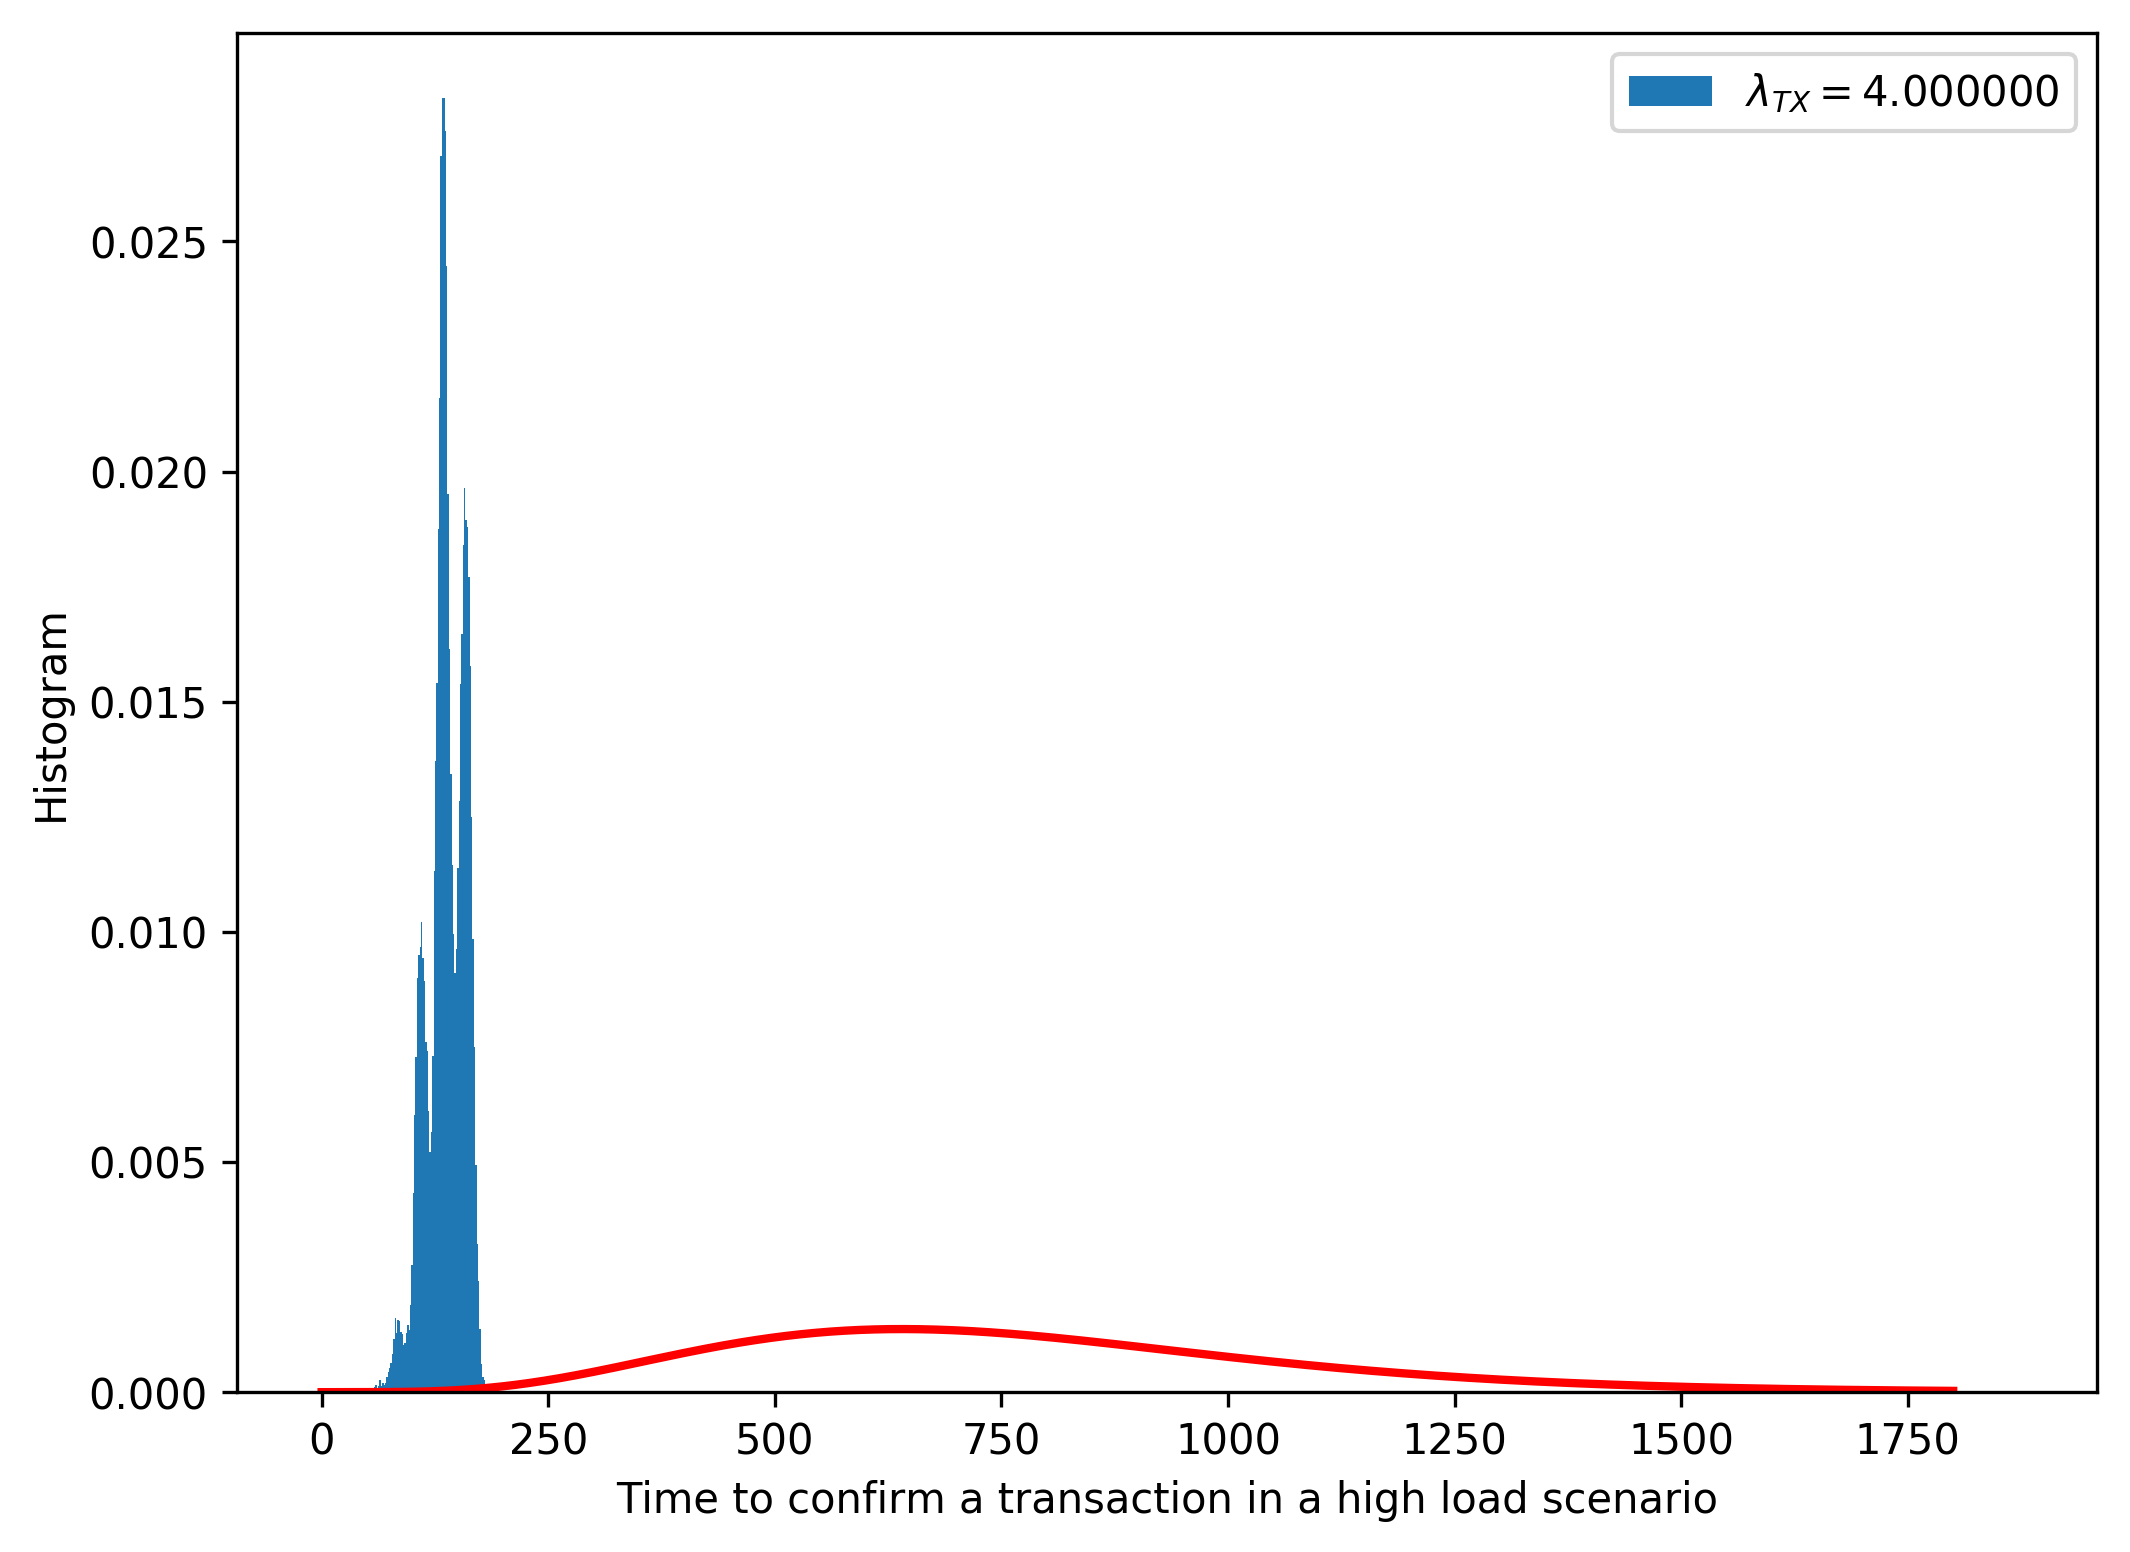

In [63]:
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(v2, bins='fd', density=True, label='$\lambda_{{TX}} = {:.6f}$'.format(g1.tx_lambda));

x = np.linspace(0, 1800, 2000)
y = scipy.stats.erlang.pdf(x, 6, 0, 128)
plt.plot(x, y, 'r', linewidth=2);

plt.ylabel('Histogram')
plt.xlabel('Time to confirm a transaction in a high load scenario');
plt.legend();

In [ ]:
print(sim.block_weight, sim.min_weight_confirmed)
for tx in nodes:
    if 'confirmed_time' in tx.extras:
        dt = tx.extras['confirmed_time'] - tx.time
        if dt > 1000:
            print(tx.name, tx.type, tx.weight, tx.acc_weight, dt)

In [ ]:
for tx in sim.blocks:
    print(tx.name, tx.weight, tx.acc_weight)

In [ ]:
dot = sim.gen_dot()
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='200, 30')

#print(dot.render())
print(dot.source)